In [7]:
#work on making this work
import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
    strains.append(str(record.id))
    genomes.append(str(record.seq))

In [8]:
len(strains)

519

In [9]:
strains[:5]

['DOM/2016/MA_WGS16_024',
 'DOM/2016/BB_0180',
 'DOM/2016/BB_0115',
 'DOM/2016/BB_0208',
 'DOM/2016/MA_WGS16_007']

# The matrix below, when constructed as a heat map, should look similar to this: 
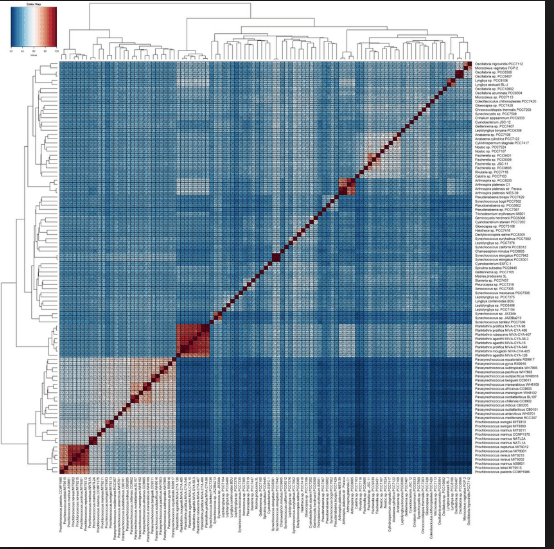

In [10]:
#using distance to calculate PCA (pairwise scores)
#compare substrings
#TFIDF(package)
#string distance (pick multiple and vectorize them)
#pairwise aligner (the average of each strain when compared with multiple other strain)
#creating a similarity matrix

In [11]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(array1, array2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(array1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if array1[i] != array2[i] and array1[i] != 'N' and array2[i] != 'N':
            distance += 1
    # Return the final count of differences
    return distance

In [34]:
string1 = "AGTNNNNNNNNNNNNNNNTCGAT"
string2 = "GNNNNAGUGNNNNNNNNAGUTUN"
def hamming_distance2(array1, array2):
    array1 = np.frombuffer(array1.encode(),dtype="S1")
    array2 = np.frombuffer(array2.encode(),dtype="S1")
    indices = np.where((array1 != "N")&(array2 != 'N'))
    print(indices)
    return (array1 != array2).sum()
hamming_distance2(string1,string2)

IndexError: tuple index out of range

In [37]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        numbers.append(num)
    matrixOfNum.append(numbers)
    numbers = []
dataa = pd.DataFrame(matrixOfNum, columns = ["strain " + str(i) for i in range(1,len(matrixOfNum) + 1)], dtype="float")
print(dataa.head())

     strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0         0.0      12.0      15.0      14.0      19.0      13.0      12.0   
1        12.0       0.0      15.0      14.0      18.0      13.0      11.0   
2        15.0      15.0       0.0      17.0      21.0      16.0      14.0   
3        14.0      14.0      17.0       0.0       8.0      15.0      13.0   
4        19.0      18.0      21.0       8.0       0.0      20.0      19.0   
5        13.0      13.0      16.0      15.0      20.0       0.0      13.0   
6        12.0      11.0      14.0      13.0      19.0      13.0       0.0   
7        13.0      12.0      15.0      12.0      18.0      14.0      13.0   
8        13.0      12.0      15.0      14.0      20.0      14.0      13.0   
9        18.0      19.0      22.0      21.0      27.0      21.0      19.0   
10       18.0      19.0      22.0      21.0      27.0      21.0      19.0   
11       15.0      15.0      16.0      16.0      20.0      16.0      14.0   

In [38]:
dataa.shape

(519, 519)

In [39]:
dataa.to_csv("DistanceMatrix",sep = ',')

AxesSubplot(0.125,0.125;0.62x0.755)


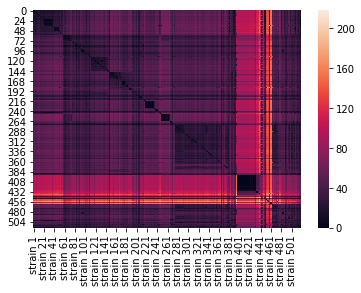

In [40]:
import seaborn as sns
print(sns.heatmap(dataa))

#This is the heat map I was talking about before

In [41]:
from sklearn.decomposition import PCA


#performing PCA on my pandas dataframe 
pca = PCA(n_components=10,svd_solver='full') #can specify n, since with no prior knowledge, I use None
principalComponents = pca.fit_transform(dataa)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component " + str(i) for i in range(1,11)])

In [42]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-149.422029,142.729551,231.600978,-56.167752,-29.934692,8.860758,6.968664,5.267695,-15.347036,-4.367828
1,-181.707429,125.323051,223.006285,-49.662056,-28.442482,6.410040,7.665989,4.261124,-14.640766,-5.035227
2,-91.393783,156.019634,231.105498,-56.454288,-34.427220,5.000896,9.653547,4.396450,-15.323866,2.725954
3,-113.046100,161.837475,238.659224,-59.295516,-30.938435,6.113677,10.712337,9.178146,-13.688195,-5.529627
4,-28.631385,183.928916,235.536151,-48.806171,-21.639508,-1.721045,9.632190,20.741460,15.419871,10.611256


In [43]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [44]:
metadata_df.head()

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,1_0015_PF,zika,KX447511,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447511,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
1,1_0016_PF,zika,KX447520,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447520,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
2,1_0030_PF,zika,KX447515,2013-11-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447515,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
3,1_0035_PF,zika,KX447514,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447514,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
4,1_0038_PF,zika,KX447517,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447517,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507


In [45]:
metadata_df.shape

(745, 15)

In [46]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [47]:
strains_df.shape

(519, 1)

In [48]:
metadata_df.shape

(745, 15)

In [49]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [50]:
result_strains.shape

(519, 15)

In [51]:
np.setdiff1d(strains_df['strain'].unique(),metadata_df['strain'].unique())

array([], dtype=object)

In [52]:
metadata_df['strain'].unique().shape

(745,)

In [53]:
finalDf = pd.concat([principalDf, result_strains[['region','country','strain']]], axis = 1)

In [54]:
finalDf.shape

(519, 13)

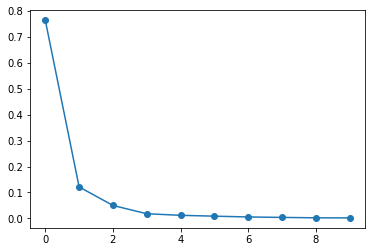

In [55]:
#explained variance for PCA plot below
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_, marker="o")

In [56]:
pca.explained_variance_

array([222066.60473065,  35277.2347927 ,  14509.59263701,   5227.01627978,
         3457.38328365,   2505.28612024,   1611.5865876 ,   1108.72536781,
          666.2395354 ,    545.11193709])

In [57]:
#look into outliers on the PCA plot and on the heat map (the strain names, the seuqences, and where are they in the phylogeny on nextstrain)

In [58]:
#plot PC2 on a number line (look into using altair)
#maybe try taking the averages of all the distances (like divide by the number of sites) or maybe disregard gaps (like don't take N)

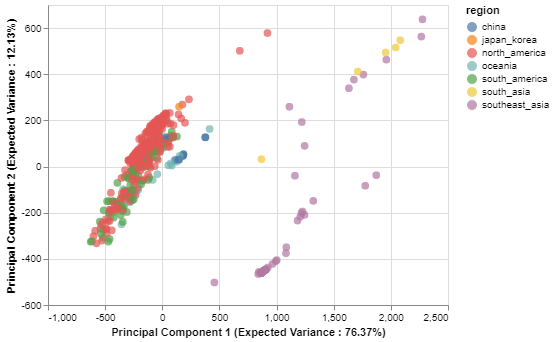

In [94]:
import altair as alt
brush = alt.selection(type='interval', resolve='global')
#link the charts
alt.Chart(finalDf).mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color='region',
    tooltip=['strain', 'region']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

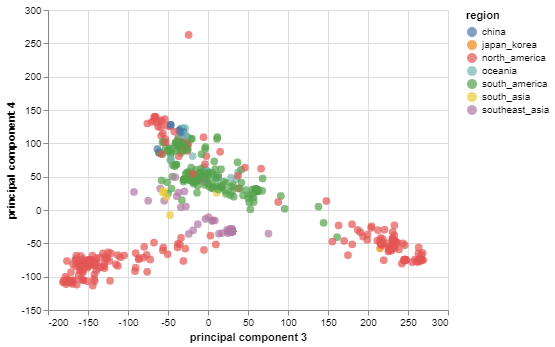

In [91]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='principal component 3',
    y='principal component 4',
    color='region',
    tooltip=['strain', 'region']
).interactive()

# Creating the Tree in Altair

In [63]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [64]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [65]:
tree = json_to_tree(json_tree_handle)

In [66]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [67]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [68]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [69]:
node_df = pd.DataFrame(node_data)

In [70]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [71]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [72]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [73]:
node_df.shape

(517, 7)

In [74]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [75]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [76]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [77]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [78]:
merged_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,region,country_x,strain,country_y,date,parent_date,parent_y,y
0,-149.422029,142.729551,231.600978,-56.167752,-29.934692,8.860758,6.968664,5.267695,-15.347036,-4.367828,north_america,dominican_republic,DOM/2016/MA_WGS16_024,dominican_republic,2016.517454,2016.177960,202.000000,202
1,-181.707429,125.323051,223.006285,-49.662056,-28.442482,6.410040,7.665989,4.261124,-14.640766,-5.035227,north_america,dominican_republic,DOM/2016/BB_0180,dominican_republic,2016.298426,2015.782991,188.000000,188
2,-91.393783,156.019634,231.105498,-56.454288,-34.427220,5.000896,9.653547,4.396450,-15.323866,2.725954,north_america,dominican_republic,DOM/2016/BB_0115,dominican_republic,2016.279261,2015.738263,171.500000,172
3,-113.046100,161.837475,238.659224,-59.295516,-30.938435,6.113677,10.712337,9.178146,-13.688195,-5.529627,north_america,dominican_republic,DOM/2016/BB_0208,dominican_republic,2016.303901,2016.145963,205.000000,205
4,-28.631385,183.928916,235.536151,-48.806171,-21.639508,-1.721045,9.632190,20.741460,15.419871,10.611256,north_america,dominican_republic,DOM/2016/MA_WGS16_007,dominican_republic,2016.358658,2016.145963,205.000000,206
5,-124.067777,152.987081,228.575758,-58.056662,-30.840781,7.109049,9.175943,5.330727,-16.684317,-5.122754,japan_korea,japan,Yokohama/1/2016,japan,2016.386037,2015.816432,198.468750,198
6,-183.032972,88.169882,233.529658,-46.153609,-12.860419,-3.100186,-0.098809,22.043370,14.540869,12.538670,north_america,dominican_republic,Dominican_Rep_Rus_3ALT_2016,dominican_republic,2016.361396,2016.025840,194.375000,194
7,-167.367148,109.647928,243.664704,-49.951886,-7.420980,-3.136077,0.024285,23.326614,12.207245,10.478843,north_america,dominican_republic,Dominican_Rep_Rus_4MRG_2016,dominican_republic,2016.394251,2015.828296,221.299805,220
8,-137.739813,133.915798,233.093915,-45.411437,-18.479821,-0.032874,4.277641,19.624071,17.150951,10.947477,north_america,dominican_republic,Dominican_Rep_Rus_5RMN_2016,dominican_republic,2016.416153,2015.906384,200.375000,200
9,-1.696951,179.856573,231.997776,-50.853540,-28.358801,-0.712571,4.855566,24.222713,21.823243,11.445345,north_america,dominican_republic,Dominican_Rep_Rus_7EGR_2016,dominican_republic,2016.651608,2016.642525,181.000000,181


# Linking the Tree with the two other PCA Plots

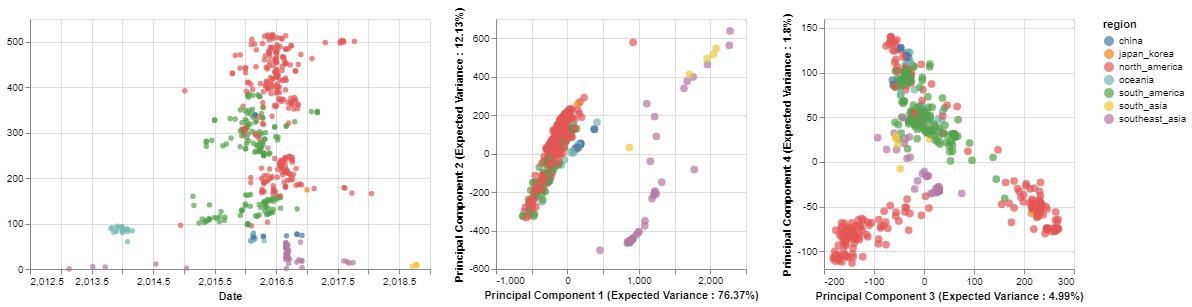

In [95]:
import altair as alt
base = alt.Chart(merged_df)
brush = alt.selection(type='interval', resolve='global')
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush).properties(width=400,height=250)

#brush = alt.selection(type='interval', resolve='global')
#link the charts
pc1 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 1',title='Principal Component 1 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[0]*100,2)) + ")"),
    y=alt.X('principal component 2',title='Principal Component 2 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[1]*100,2)) + ")"),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

pc34 = base.mark_circle(size=60).encode(
    x=alt.X('principal component 3',title='Principal Component 3 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[2]*100,2)) + ")"),
    y=alt.X('principal component 4',title='Principal Component 4 (Expected Variance : {}%'.format(round(pca.explained_variance_ratio_[3]*100,2)) + ")"),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
#make region clickable
tree_name|pc1|pc34
#pc1.encode(x='principal component 1') | pc34.encode(x='principal component 3') #link the tree to this one as well

In [91]:
#Fix the linkning of the tree AND the two PCA plots
tree.encode(x='date')|pc1.encode(x='principal component 1')|pc34.encode(x='principal component 3') 

## The below code is for the heat map -- it takes a long time to run and should only be used for debugging 

In [20]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        if(len(numbers) < 3):
            numbers.append(strains[i])
            numbers.append(strains[j])
            numbers.append(num)
            matrixOfNum.append(numbers)
            numbers = []
new_data = pd.DataFrame(matrixOfNum, columns = ["Strain A", "Strain B", "distance"], dtype="float")
print(new_data)

KeyboardInterrupt: 

In [ ]:
#to to_csv on the distance dataframe and save it somewhere
#This is the heat map -- dont DONT run this cell unless you need one
alt.data_transformers.disable_max_rows()
alt.Chart(new_data).mark_rect().encode(
    x='Strain A:N',
    y='Strain B:N',
    color='distance:Q',
    tooltip = ['Strain A', "Strain B","distance"]
).interactive()


In [150]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [196]:
s1 = {1,1,2}

In [197]:
s2 = {1,2,3,4}

In [199]:
s1.intersection(s2)

{1, 2}

In [200]:
s3 = s1 - s2

In [201]:
s3

set()

In [202]:
s4 = s2 - s1

In [203]:
s4

{3, 4}